In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fires_filtered = pd.read_csv(r"C:\Users\Will\OneDrive\Desktop\Projects\Northern Nevada Fire Project\NV_FireOccurence_1992_to_present_162173409243348909_filtered.csv", encoding = "ISO-8859-1")
pd.set_option('display.max_columns', None)

In [3]:
# Add GeoId Column for each county

county_geoid = {
    'Washoe': '32031',
    'Carson City': '32510',
    'Storey': '32029',
    'Lyon': '32019',
    'Churchill': '32001',
    'Mineral': '32021',
    'Douglas': '32005',
    'Mono': '06051',
    'Tuolumne': '06109',
    'Alpine': '06003',
    'El Dorado': '06017',
    'Placer': '06061',
    'Nevada': '06057',
    'Sierra': '06091',
    'Plumas': '06063'
}

fires_filtered['county_geoid'] = fires_filtered['County'].map(county_geoid)

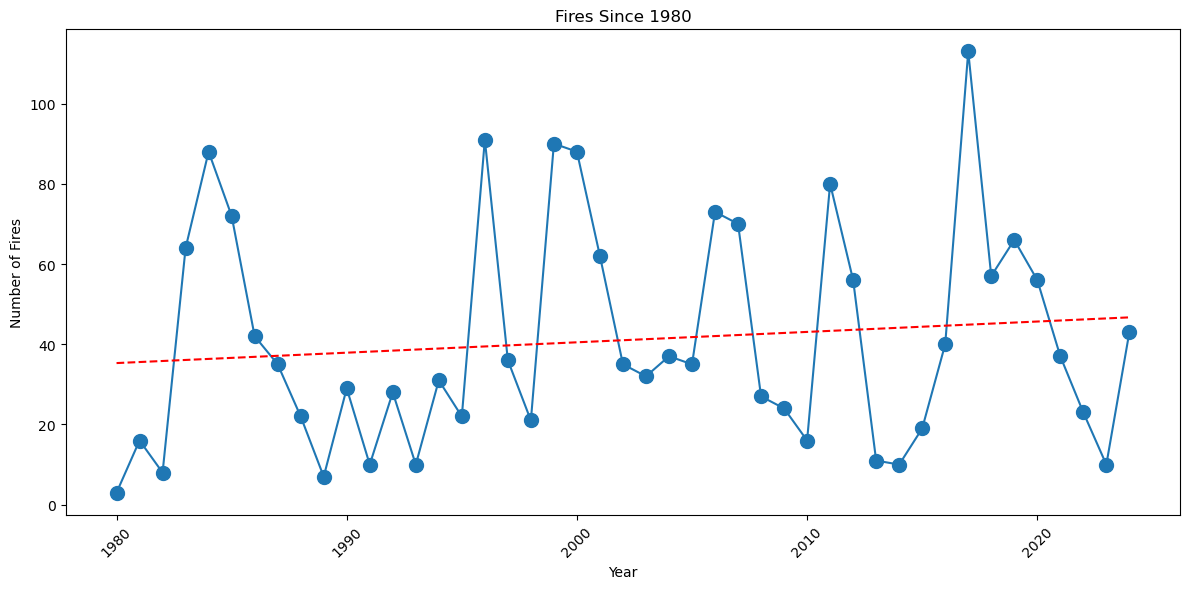

In [11]:
plt.figure(figsize=(12, 6))

fires_grouped_year = fires_filtered.groupby("Year")['OBJECTID'].count().reset_index()
fires_grouped_year.rename(columns={'OBJECTID': 'fire_count'}, inplace=True)
x = fires_grouped_year['Year'].astype(int)
y = fires_grouped_year['fire_count']

# Calculate trend line
coeffs1 = np.polyfit(x, y, deg=1)
trend_line1 = np.poly1d(coeffs1)
y_trend = trend_line1(x)

# Plot actual data
plt.plot(x, y, marker='o', linestyle='-', label='Fire Count',markersize=10)

# Plot trend line
plt.plot(x, y_trend, linestyle='--', color='red', label='Trend Line')



# Labels and formatting
plt.title('Fires Since 1980')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


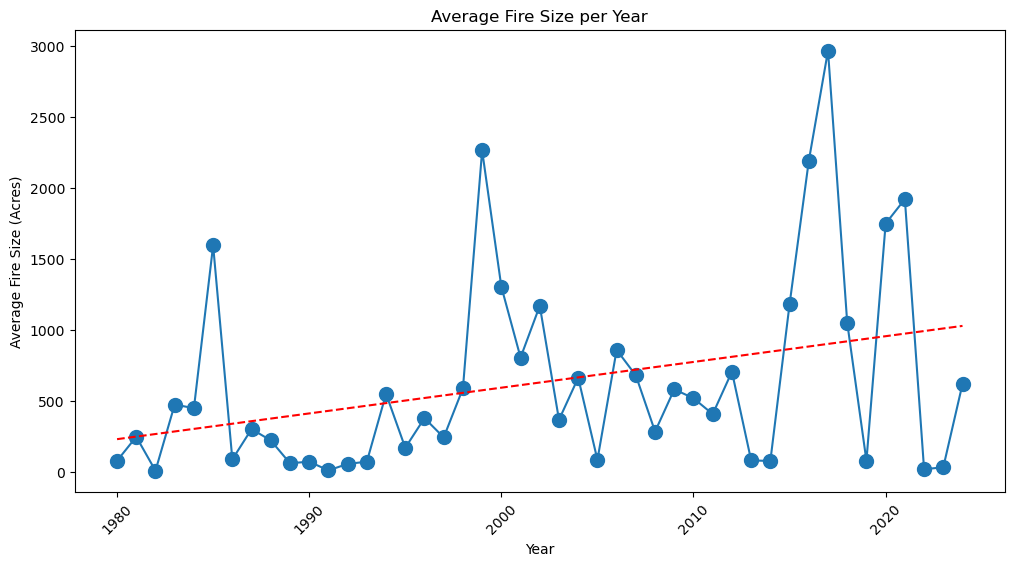

In [13]:
acres_grouped_year_avg = fires_filtered.groupby('Year')['Acres'].mean().dropna().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
x = acres_grouped_year_avg['Year']
y = acres_grouped_year_avg['Acres']

# Calculate trend line
coeffs1 = np.polyfit(x, y, deg=1)
trend_line1 = np.poly1d(coeffs1)
y_trend = trend_line1(x)

plt.plot(acres_grouped_year_avg['Year'], acres_grouped_year_avg['Acres'], marker='o', linestyle='-', markersize=10)
plt.plot(x, y_trend, linestyle='--', color='red', label='Trend Line')
plt.xlabel('Year')
plt.ylabel('Average Fire Size (Acres)')
plt.xticks(rotation=45)
plt.title('Average Fire Size per Year')

plt.show()

In [4]:
def fire_size(Acres):
    if Acres <100:
        return 'Small'
    elif 100 <= Acres < 1000:
        return 'Medium'
    elif 1000 <= Acres < 10000:
        return 'Large'
    else:
        return 'Very Large'

fires_filtered['fire_size'] = fires_filtered['Acres'].apply(fire_size)

In [5]:
fires_filtered_small = fires_filtered[fires_filtered['fire_size']=='Small']
fires_filtered_medium = fires_filtered[fires_filtered['fire_size']=='Medium']
fires_filtered_large = fires_filtered[fires_filtered['fire_size']=='Large']
fires_filtered_vry_large = fires_filtered[fires_filtered['fire_size']=='Very Large']
fires_filtered_above_large = fires_filtered[fires_filtered['fire_size'].isin(['Large','Very Large'])]

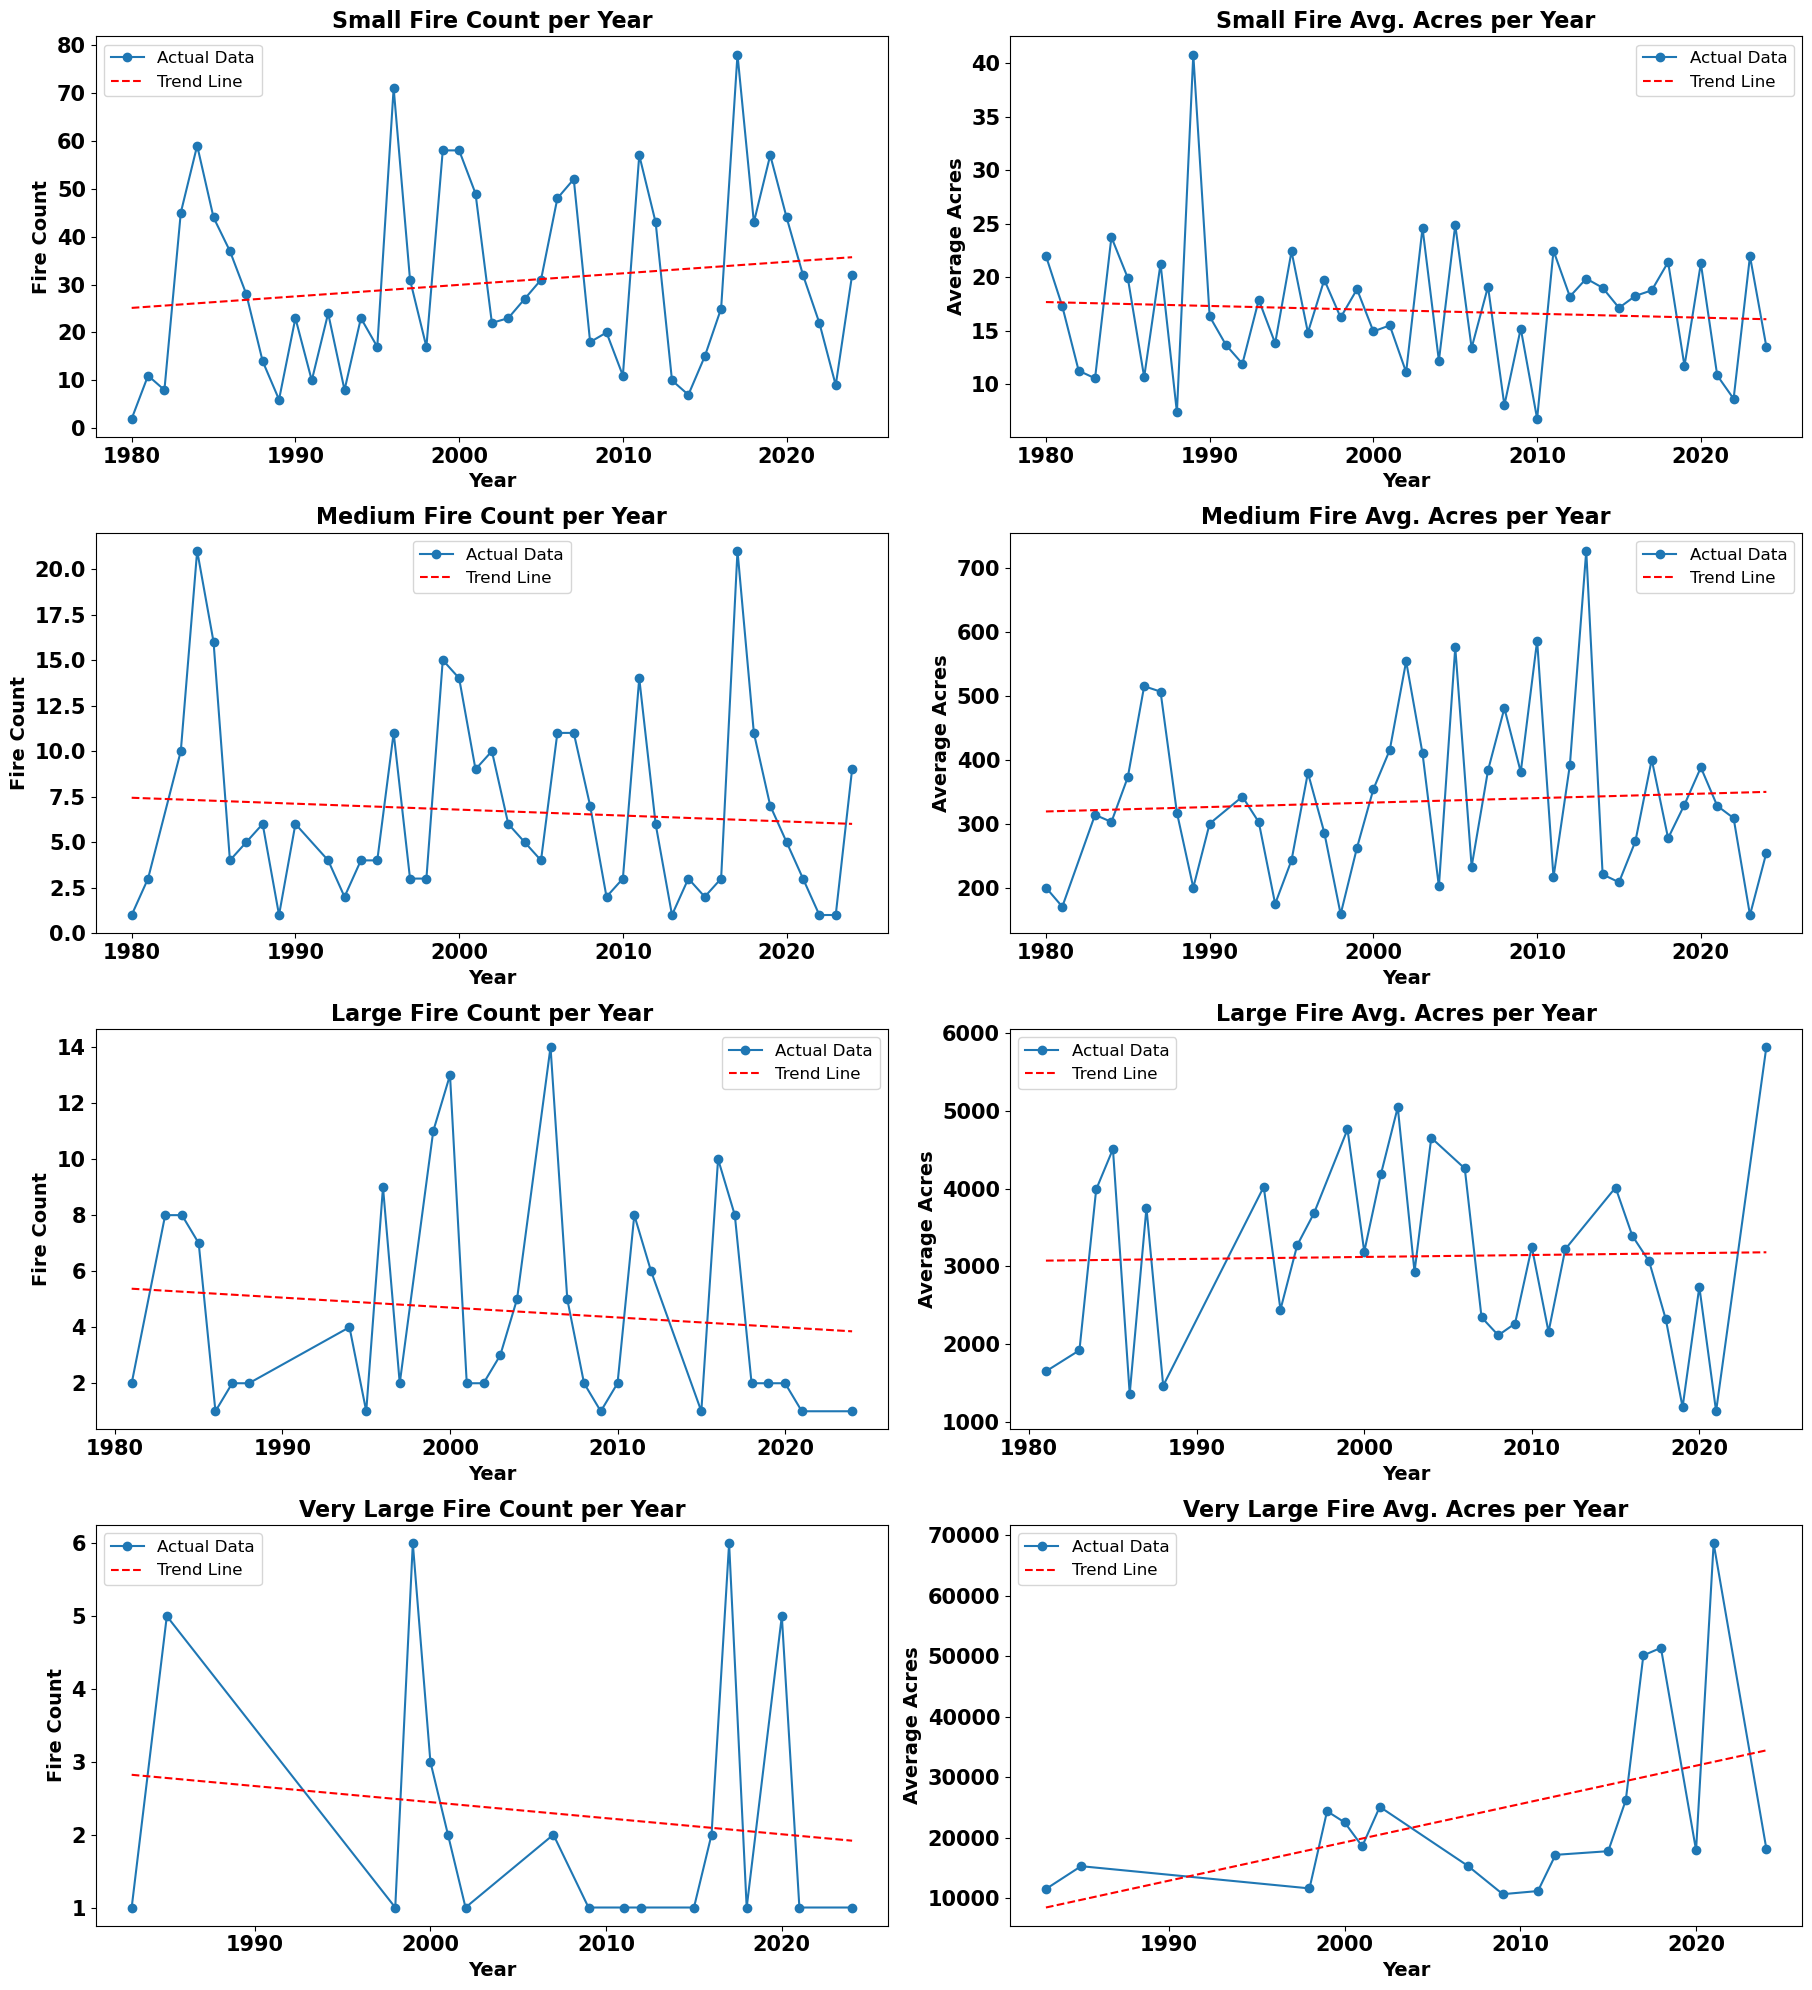

In [8]:
fig, axs = plt.subplots(4, 2, figsize=(18, 20))

categories = [
    ('Small', fires_filtered_small),
    ('Medium', fires_filtered_medium),
    ('Large', fires_filtered_large),
    ('Very Large', fires_filtered_vry_large)
]

for i, (label, df) in enumerate(categories):
    # Fire count per year
    count_data = df.groupby('Year')['OBJECTID'].count().reset_index()
    x_count = count_data['Year']
    y_count = count_data['OBJECTID']
    coeffs_count = np.polyfit(x_count, y_count, deg=1)
    trend_count = np.poly1d(coeffs_count)
    y_count_trend = trend_count(x_count)

    axs[i, 0].plot(x_count, y_count, marker='o', linestyle='-', label='Actual Data')
    axs[i, 0].plot(x_count, y_count_trend, linestyle='--', color='red', label='Trend Line')
    axs[i, 0].set_title(f'{label} Fire Count per Year', fontsize=16, fontweight='bold')
    axs[i, 0].set_xlabel('Year', fontsize=14, fontweight='bold')
    axs[i, 0].set_ylabel('Fire Count', fontsize=14, fontweight='bold')
    axs[i, 0].tick_params(axis='x', labelsize=15)
    axs[i, 0].tick_params(axis='y', labelsize=15)
    axs[i, 0].legend(fontsize=12)
    plt.setp(axs[i, 0].get_xticklabels(), fontweight='bold')
    plt.setp(axs[i, 0].get_yticklabels(), fontweight='bold')

    # Average acres per year
    acres_data = df.groupby('Year')['Acres'].mean().reset_index()
    x_acres = acres_data['Year']
    y_acres = acres_data['Acres']
    coeffs_acres = np.polyfit(x_acres, y_acres, deg=1)
    trend_acres = np.poly1d(coeffs_acres)
    y_acres_trend = trend_acres(x_acres)

    axs[i, 1].plot(x_acres, y_acres, marker='o', linestyle='-', label='Actual Data')
    axs[i, 1].plot(x_acres, y_acres_trend, linestyle='--', color='red', label='Trend Line')
    axs[i, 1].set_title(f'{label} Fire Avg. Acres per Year', fontsize=16, fontweight='bold')
    axs[i, 1].set_xlabel('Year', fontsize=14, fontweight='bold')
    axs[i, 1].set_ylabel('Average Acres', fontsize=14, fontweight='bold')
    axs[i, 1].tick_params(axis='x', labelsize=15)
    axs[i, 1].tick_params(axis='y', labelsize=15)
    axs[i, 1].legend(fontsize=12)
    plt.setp(axs[i, 1].get_xticklabels(), fontweight='bold')
    plt.setp(axs[i, 1].get_yticklabels(), fontweight='bold')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


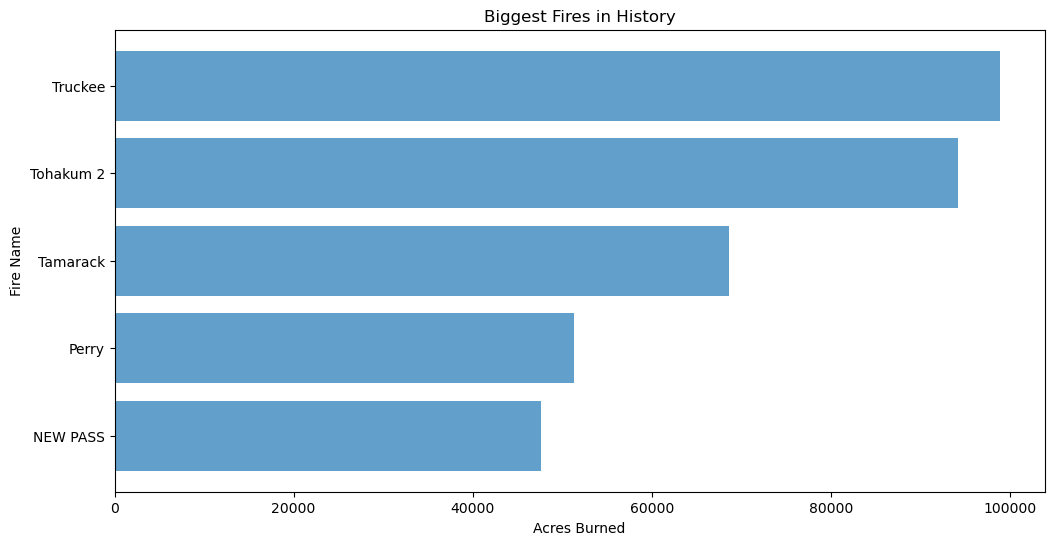

In [14]:
top_5_biggest_fires = fires_filtered.nlargest(5, 'Acres')[['Fire Name', 'Acres', 'Year']]

plt.figure(figsize=(12, 6))
plt.barh(top_5_biggest_fires['Fire Name'], top_5_biggest_fires['Acres'], alpha=0.7)

plt.xlabel('Acres Burned')
plt.ylabel('Fire Name')
plt.title('Biggest Fires in History')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest fire on top
plt.savefig("3-Biggest Fires in History.svg", bbox_inches='tight')


plt.show()

In [16]:
fire_cause_summary = fires_filtered.groupby("Cause").agg(
    Number_of_Fires=("Cause", "count"),
    Total_Acres_Burned=("Acres", "sum")
).reset_index()

fire_cause_summary


,Cause,Number_of_Fires,Total_Acres_Burned
0,Human,856,508786.927623
1,Natural,772,997646.324900
2,Undetermined,217,155555.717749


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


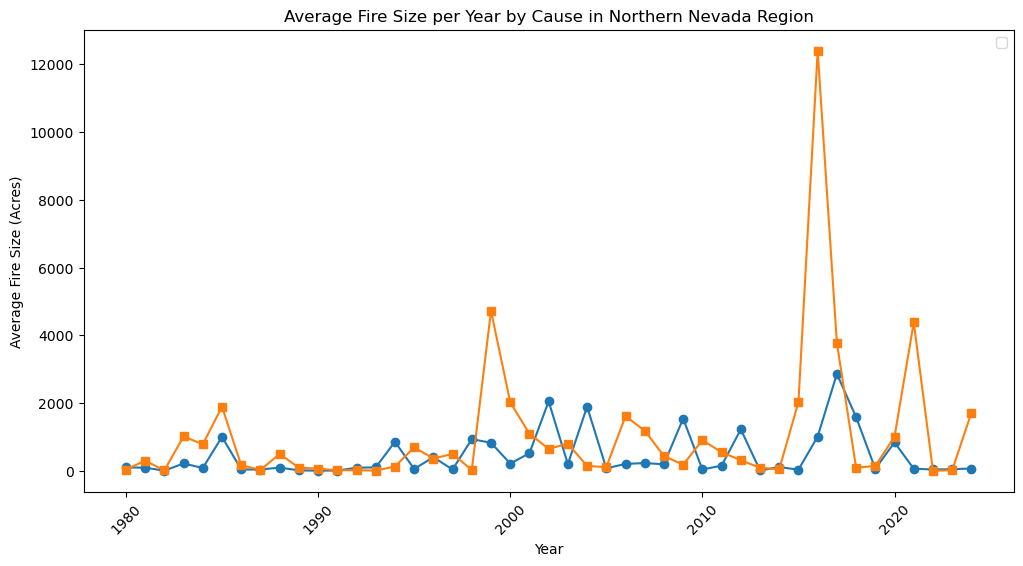

In [18]:
avg_fire_size_by_cause = fires_filtered.groupby(['Year', 'Cause'])['Acres'].mean().unstack()

plt.figure(figsize=(12, 6))
plt.plot(avg_fire_size_by_cause.index, avg_fire_size_by_cause['Human'], marker='o', linestyle='-')
plt.plot(avg_fire_size_by_cause.index, avg_fire_size_by_cause['Natural'], marker='s', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Fire Size (Acres)')
plt.title('Average Fire Size per Year by Cause in Northern Nevada Region')
plt.xticks(rotation=45)

plt.legend()
plt.savefig("5-Average Fire Size per Year by Cause in Northern Nevada Region.svg", bbox_inches='tight')
plt.show()

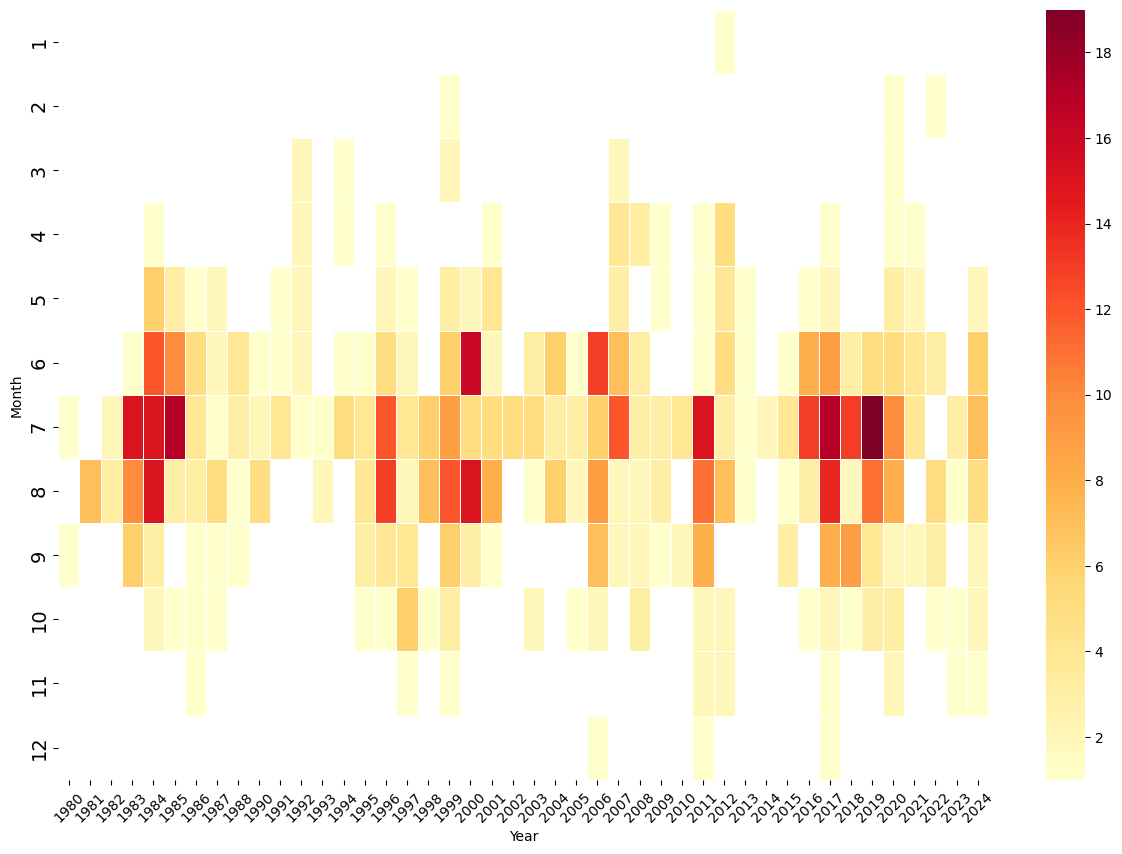

In [19]:
fires_washoe = fires_filtered[fires_filtered['County'] == 'Washoe']

year_month_grouped = pd.DataFrame(fires_washoe.groupby(['Year','Month'])['OBJECTID'].count())
year_month_grouped.rename(columns={'OBJECTID': 'fire_count'}, inplace=True)
year_month_grouped_pivot = pd.pivot_table(year_month_grouped, values = 'fire_count', index = ['Month'], columns = ['Year'])
fig, ax = plt.subplots(figsize=(15,10))  
ax.tick_params(axis='y', labelsize=14)

sns.heatmap(year_month_grouped_pivot, cmap='YlOrRd', linewidths=.5, ax=ax)

plt.xticks(rotation=45)
plt.savefig("6-Fires by Month per Year.svg", bbox_inches='tight')
plt.show()

In [20]:
month_sum_grouped = pd.DataFrame(year_month_grouped.groupby('Month')['fire_count'].sum())
total_fire_count = month_sum_grouped['fire_count'].sum()

month_sum_grouped['percentage'] = (month_sum_grouped['fire_count']/ total_fire_count)*100
month_sum_grouped

,fire_count,percentage
Month,,
1,1,0.115741
2,3,0.347222
3,8,0.925926
4,23,2.662037
5,47,5.439815
6,155,17.939815
7,271,31.365741
8,209,24.189815
9,89,10.300926


In [23]:
counties_gpd = gpd.read_file(r"C:\Users\Will\OneDrive\Desktop\Projects\tl_2019_us_county\tl_2019_us_county.shp")


fires_acres_county = fires_filtered.groupby(['County', 'county_geoid']).agg(
    fires=('OBJECTID','count'),
    acres_burned=('Acres', 'mean')
).reset_index()


fires_acres_county_merged = fires_acres_county.merge(counties_gpd, left_on="county_geoid", right_on="GEOID", how="left")
fires_acres_county_merged = fires_acres_county_merged.set_geometry("geometry")

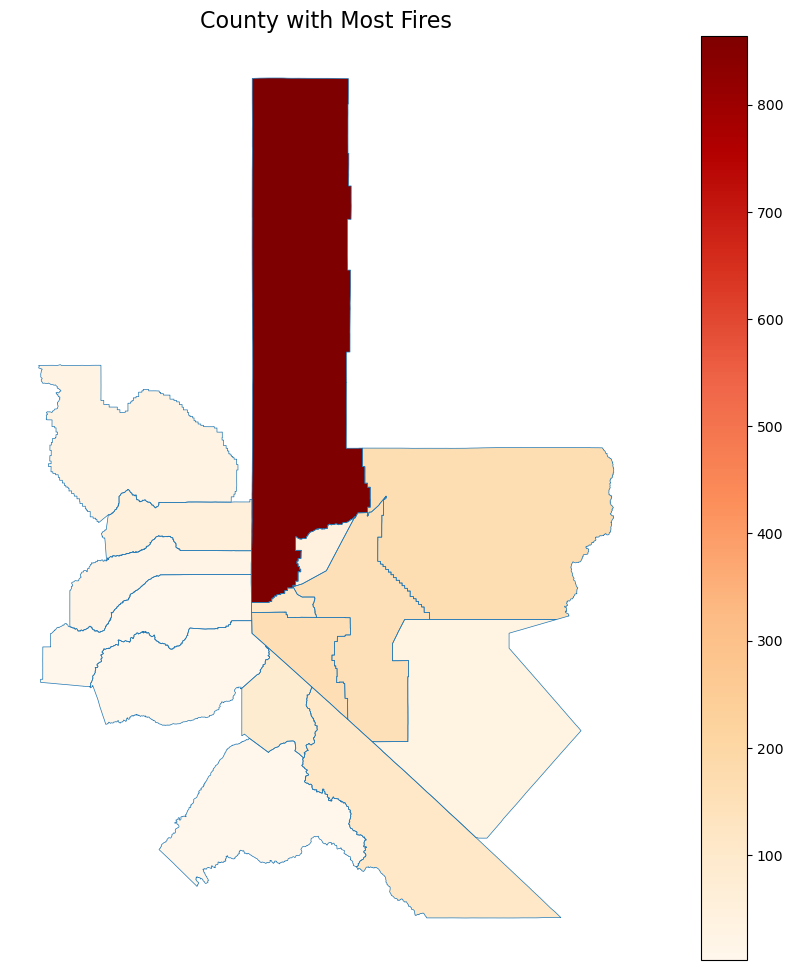

In [24]:
fires_acres_county_merged = gpd.GeoDataFrame(
    fires_acres_county_merged, geometry=fires_acres_county_merged['geometry']
)

fires_acres_county_merged.set_crs(epsg=4326, allow_override=True, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Plot boundaries and colored map
fires_acres_county_merged.boundary.plot(ax=ax, linewidth=0.5)
fires_acres_county_merged.plot(column='fires', ax=ax, legend=True, cmap='OrRd', missing_kwds={
    "color": "lightgrey",
    "label": "No Data"
})

# Add title and clean up axes
ax.set_title("County with Most Fires", fontsize=16)
ax.set_axis_off()

plt.savefig("7-County with Most Fires.svg", bbox_inches='tight')

plt.show()

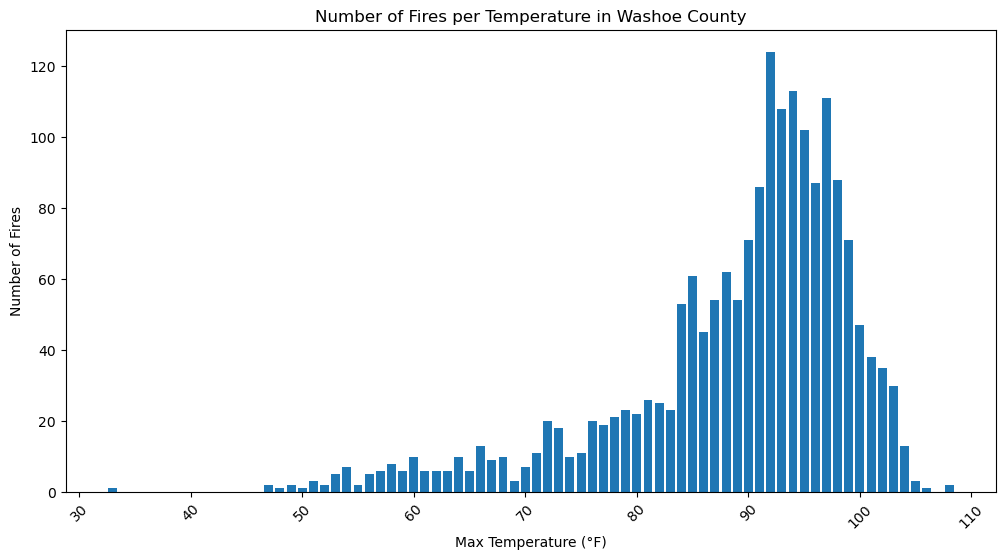

In [25]:
weather = pd.read_csv(r"C:\Users\Will\OneDrive\Desktop\Projects\Northern Nevada Fire Project\temperature_data.csv", encoding = "ISO-8859-1")
weather['Date'] = pd.to_datetime(weather['DATE'], errors='coerce')
fires_filtered['Date'] = pd.to_datetime(fires_filtered['Date'], errors='coerce')


# Merge wildfire data with temperature data on DATE
fires_filtered = fires_filtered.merge(weather, on='Date', how='inner')

# Group by temperature and count number of fires
fires_per_temperature = fires_filtered.groupby('Max Temperature').size().reset_index(name='Fire Count')

# Visualize the amount of fires per temperature
plt.figure(figsize=(12, 6))
plt.bar(fires_per_temperature['Max Temperature'], fires_per_temperature['Fire Count'])
plt.xlabel('Max Temperature (°F)')
plt.ylabel('Number of Fires')
plt.title('Number of Fires per Temperature in Washoe County')
plt.xticks(rotation=45)
plt.savefig("8-Number of Fires per Temperature in Washoe County.svg", bbox_inches='tight')
plt.show()
